$\newcommand{\Sum}{\sum\limits}$
$\newcommand{\Prod}{\prod\limits}$
$\newcommand{\Max}{\max\limits}$
$\newcommand{\Min}{\min\limits}$
$\newcommand{\Int}{\int\limits}$
$\newcommand{\Exp}{\mathbb{E}}$
$\newcommand{\Var}{\mathbb{V}}$
$\newcommand{\Energy}{\mathcal{E}}$
$\newcommand{\Prob}{\mathcal{P}}$
$\newcommand{\N}{\mathcal{N}}$

$\newcommand{\LogLike}{\mathcal{L}}$
$\newcommand{\Like}{\ell}$

$\newcommand{\bolda}{\boldsymbol{a}}$
$\newcommand{\boldA}{\boldsymbol{A}}$
$\newcommand{\ba}{\bolda}$
$\newcommand{\bA}{\boldA}$

$\newcommand{\boldb}{\boldsymbol{b}}$
$\newcommand{\boldB}{\boldsymbol{B}}$
$\newcommand{\bb}{\boldb}$
$\newcommand{\bB}{\boldB}$

$\newcommand{\boldd}{\boldsymbol{d}}$
$\newcommand{\boldD}{\boldsymbol{D}}$
$\newcommand{\bd}{\boldd}$
$\newcommand{\bD}{\boldED}$
$\newcommand{\bolde}{\boldsymbol{e}}$
$\newcommand{\boldE}{\boldsymbol{E}}$
$\newcommand{\be}{\bolde}$
$\newcommand{\bE}{\boldE}$
$\newcommand{\boldf}{\boldsymbol{f}}$
$\newcommand{\boldF}{\boldsymbol{F}}$
$\newcommand{\bf}{\boldf}$
$\newcommand{\bF}{\boldF}$
$\newcommand{\bolds}{\boldsymbol{s}}$
$\newcommand{\boldS}{\boldsymbol{S}}$
$\newcommand{\bs}{\boldsymbol{\bolds}}$
$\newcommand{\bS}{\boldsymbol{\boldS}}$
$\newcommand{\boldt}{\boldsymbol{s}}$
$\newcommand{\boldT}{\boldsymbol{S}}$
$\newcommand{\bt}{\boldsymbol{\boldt}}$
$\newcommand{\bT}{\boldsymbol{\boldT}}$

$\newcommand{\boldu}{\boldsymbol{u}}$
$\newcommand{\boldU}{\boldsymbol{U}}$
$\newcommand{\bu}{\boldu}$
$\newcommand{\bU}{\boldU}$
$\newcommand{\boldv}{\boldsymbol{v}}$
$\newcommand{\boldV}{\boldsymbol{V}}$
$\newcommand{\bv}{\boldv}$
$\newcommand{\bV}{\boldV}$
$\newcommand{\boldx}{\boldsymbol{x}}$
$\newcommand{\boldX}{\boldsymbol{X}}$
$\newcommand{\bx}{\boldx}$
$\newcommand{\bX}{\boldX}$
$\newcommand{\boldY}{\boldsymbol{Y}}$
$\newcommand{\boldy}{\boldsymbol{y}}$
$\newcommand{\bY}{\boldY}$
$\newcommand{\by}{\boldy}$
$\newcommand{\boldZ}{\boldsymbol{Z}}$
$\newcommand{\boldz}{\boldsymbol{z}}$
$\newcommand{\bZ}{\boldZ}$
$\newcommand{\bz}{\boldz}$

$\newcommand{\boldTheta}{\boldsymbol{\Theta}}$
$\newcommand{\boldtheta}{\boldsymbol{\theta}}$
$\newcommand{\bTheta}{\boldTheta}$
$\newcommand{\btheta}{\boldtheta}$

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\diag}{\text{diag}}$
$\newcommand{\rank}{\text{rank}}$

In [85]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<a id='toc'></a>
# Содержание
* [Теория](#theory)
    * [PCA (Principal Component Analysis)](#pca)
    * [Сингулярное разложение](#svd)
        * [Запись SVD-разложения](#svd_view)
        * [Смысл матриц $U$, $\Sigma$, $V$ в SVD-разложении](#svd_sense)
        * [Алгоритм нахождения SVD-разложения](#svd_simple_algo)
    * [Нахождение собственных значений и собственных векторов](#methods)
        * [Итерационный алгоритм](#th_eig_it)
    * [PCA](#theory_pca)
    * [Probabilistic PCA](#probabilistic)
* [Применение](#application)
    * [Снижение размерности (data reduction)]
    * [Отбеливание (whitening, sphereing)]
    * [Визуализация (visualizing)] 
* []

Требуется спроектировать векторы $\boldx_1, \dots, \boldx_n$ из пространства размерности $m$ на некоторое его $k$-мерное подпространство, так чтобы сумма квадратов длин проекций была максимальна. 


Существует несколько эквивалентных математических формулировок метода главных компонент. Основная идея заключается в нахождении таких попарно ортогональных направлений в исходном многомерном пространстве, вдоль которых данные имеют наибольший разброс (выборочную дисперсию). Эти направления называются главными компонентами. 

Другая формулировка PCA – для данной многомерной случайной величины построить такое ортогональное преобразование координат, что в результате корреляции между отдельными координатами обратятся в ноль. Таким образом, задача сводится к диагонализации матрицы ковариаций, что эквивалентно нахождению сингулярного разложения матрицы исходных данных. Хотя формально задачи сингулярного разложения матрицы данных и спектрального разложения ковариационной матрицы совпадают, алгоритмы вычисления сингулярного разложения напрямую, без вычисления ковариационной матрицы и её спектра, более эффективны и устойчивы.

Ещё одной из формулировок задачи PCA является нахождение такой $d$-мерной плоскости в признаковом пространстве, что ошибка проецирования обучающих объектов на нее будет минимальной. Направляющие векторы этой плоскости и будут первыми $d$ главными компонентами.

Обобщение: если хотим ввести $k$-размерное пространства вместо $n$- размерного, берем $k$ собственных векторов ковариационной матрицы $\Sigma$, соответсвующих $k$ максимальным собственным значениям. Тогда новым образом каждой точки $x^{(i)} \in \mathbb{R}^n$ обучающей выборки будет 
$$\Large z^{(i)} = \left[
\begin{array}{c}
u_1^Tx^{(i)} \\ 
u_2^Tx^{(i)} \\ 
\ldots \\ 
u_k^Tx^{(i)} 
\end{array}
\right] \in \mathbb{R}^k$$

Один из наиболее эффективных способов нахождения собственных векторов матрицы $\Sigma$ - использование сингулярного разложения исходной матрицы $X$:

$$\Large X = UDV^T,$$

где $U \in R^{m \times m}$,  $V \in R^{n \times n}$, а $D \in R^{m \times n}$ - диагональная матрица вида

<img src='../../img/svd_diag_matrix.png' width=70%>

### Сингулярное разложение

Рассмотрим более подробно задачу о сингулярном разложении матрицы $X \in \mathbb{R}^{m \times n}$. 
*Сингулярным разложением* матрицы $X$ называется представление её в виде $X = UD V^T$, где:

 - $D$ есть $m\times n$ матрица у которой элементы, лежащие на главной диагонали, неотрицательны, а все остальные элементы равны нулю.
 - $U$ и $V$ – ортогональные матрицы порядка $m$  и $n$ соответственно.
 
Элементы главной диагонали матрицы $D$ называются *сингулярными числами* матрицы $X$, а столбцы $U$ и $V$ левыми и правыми *сингулярными векторами* матрицы $X$.

Заметим, что матрицы $XX^T$ и $X^TX$ являются симметрическими неотрицательно определенными матрицами, и поэтому ортогональным преобразованием могут быть приведены к диагональному виду, причем на диагонали будут стоять неотрицательные собственные значения этих матриц.

В силу указанных выше свойств матриц $X^TX$ и $XX^T$ сингулярное разложение матрицы $X$ тесно связано с задачей о спектральном разложении этих матриц. Более точно:
- Левые сингулярные векторы матрицы $X$ – это собственные векторы матрицы $XX^T$.
- Правые сингулярные векторы матрицы $X$ – это собственные векторы матрицы $X^TX$.
- Сингулярные числа матрицы $X$ - это корни из собственных значений матрицы $X^TX$ (или $XX^T$).

Таким образом, для нахождения сингулярного разложения матрицы $X$ необходимо, найти собственные векторы и значения матриц $X^TX$ и $XX^T$ и составить из них матрицы $U, V, D$.

### Алгоритм PCA
1. Определить $k<n$ – новую размерность
2. Вычесть из $X$ среднее, то есть заменить все $\Large x^{(i)}$  на $$\Large  x^{(i)} - \frac{1}{m} \sum_{i=1}^{m}{x^{(i)}}$$
3. Привести данные к единичной дисперсии: посчитать $$\Large  \sigma_j^2 = \frac{1}{m} \sum_{i=1}^{m}{(x^{(i)})^2}$$
и заменить $\Large x_j^{(i)}$ на $\Large \frac{x_j^{(i)}}{\sigma_j}$ 
4. Найти сингулярное разложение матрицы $X$:
$$\Large X = UDV^T$$
5. Положить $V =$ [$k$ левых столбцов матрицы $V$]
6. Вернуть новую матрицу $$\Large Z = XV \in \mathbb{R}^{m \times k}$$

<a id='theory'></a>

# Теория [[toc](#toc)]

Хотим выбрать плоскость такую, что в перпендикулярном ей направлении дисперсия значений проекций точек максимальна. Пусть $u$ --- перпендикуляр к плоскости. Пусть $F(\boldu;\boldX)$ --- среднее значение квадрата проекций точек на направление $\boldu$:
\begin{gather}
F(\boldu;\boldX) = \frac{1}{N}\Sum_{i=1}^N \left\|\frac{(\boldx_i - \bar{\boldx}, \boldu)}{(\boldu, \boldu)} \boldu\right\|^2_2 = 
\frac{1}{N}\frac{\Sum_{i=1}^N (\boldx_i - \bar{\boldx}, \boldu)^2}{(\boldu, \boldu)} \rightarrow \max_{\boldu \in \mathbb{R}^N} 
\end{gather}
Пусть вектор $\boldu$ нормирован. Тогда приходим к задаче оптимизации
\begin{gather}
F(\boldu;\boldX)  = \frac{1}{N}\Sum_{i=1}^N (\boldx_i - \bar{\boldx}, \boldu)^2 \rightarrow \max_{\|\boldu\|^2_2 = 1} 
\end{gather}

Лагранжиан имеет вид
\begin{gather}
L(\boldu,\lambda) = \frac{1}{N}\Sum_{i=1}^N (\boldx_i - \bar{\boldx}, \boldu)^2 - \frac{\lambda}{2} (\|\boldu\|_2^2 - 1)
\end{gather}
Дифференцируя $L(\boldu, \lambda)$ по $\boldu$, получаем
\begin{gather}
\frac{\partial L(\boldu, \lambda)}{\partial \lambda} = \frac{2}{N}(\boldx_i - \bar{\boldx}, \boldu) \cdot (\boldx_i - \bar{\boldx}) - 2\lambda \boldu \\
\frac{\partial L(\boldu, \lambda)}{\partial \lambda}  = 0 \Leftrightarrow \lambda \boldu = \frac{1}{N}\Sum_{i=1}^N (\boldx_i - \bar{\boldx}) \cdot (\boldx_i - \bar{\boldx}, \boldu) = \frac{1}{N}\Sum_{i=1}^N (\boldx_i - \bar{\boldx}) (\boldx_i - \bar{\boldx})^T \cdot \boldu
\end{gather}
Здесь появляется матрица ковариации $\boldS$:
\begin{gather}
\boldS = \frac{1}{N}\Sum_{i=1}^N (\boldx_i - \bar{\boldx}) (\boldx_i - \bar{\boldx})^T
\end{gather}

Таким образом, искомое направление задается собственный вектором матрицы ковариаций $\boldS$. При этом среднее значение квадратов длин проекций равно собственному значению.
\begin{gather}
F(\boldu;\boldX) = \frac{1}{N}\Sum_{i=1}^N (\boldx_i - \bar{\boldx}, \boldu)^2 = \frac{1}{N}\Sum_{i=1}^N \boldu^T (\boldx_i - \bar{\boldx})(\boldx_i - \bar{\boldx})^T \boldu = \boldu^T \boldS \boldu = \lambda \|\boldu\|_2^2 = \lambda.
\end{gather}
Выбрав собственный вектор $\boldu_1$, которому соответствует максимальное собственное значение $\lambda_1$ матрицы ковариаций $\boldS$, получим искомое направление.

#### Итеративная процедура нахождения направлений максимальной дисперсии

Пусть $\lambda_1, \lambda_2, \dots, \lambda_D$ --- собственные векторы матрицы $S$, в порядке убывания, а $\boldu_1, \boldu_2, \dots, \boldu_D$ --- соответствующие им собственные значения. Докажем, что описанная выше процедура итеративного нахождения направлений наибольшей дисперсии приведт в конечном счете к векторам  $\boldu_1, \boldu_2, \dots, \boldu_D$.

На первом этапе $\boldS_1 = \boldS$ получили вектор направления $\boldu_1$ с собственным значением $\lambda_1$. Теперь найдем следующий вектор. Выясним, как будет выглядеть матрица ковариаций на второй итерации $\boldS_2$. 

Вычтем из каждого вектора $\boldx_i$ его проекцию на $\boldu_1$ и для полученных векторов найдем матрицу ковариации.
\begin{gather}
\boldS_2 = \frac{1}{N}\Sum_{i=1}^N\left(\boldx_i - (\boldx_i, \boldu_1)\boldu_1 - (\bar{\boldx} - (\bar{\boldx}, \boldu_1)\boldu_1)\right)\left(\boldx_i - (\boldx_i, \boldu_1)\boldu_1 - (\bar{\boldx} - (\bar{\boldx}, \boldu_1)\boldu_1)\right)^T = \\ = \frac{1}{N}\Sum_{i=1}^N\left(\boldx_i - \bar{\boldx} - (\boldx_i - \bar{\boldx}, \boldu_1)\boldu_1 \right) \left(\boldx_i - \bar{\boldx} - (\boldx_i - \bar{\boldx}, \boldu_1)\boldu_1 \right)^T = \\ =\frac{1}{N} \Sum_{i=1}^N \left\{(\boldx_i - \bar{\boldx})(\boldx_i - \bar{\boldx})^T - 2 (\boldx_i - \bar{\boldx}) \cdot (\boldx_i - \bar{\boldx}, \boldu_1)  \cdot \boldu_1^T + \boldu_1 \boldu_1^T (\boldx_i - \bar{\boldx}, \boldu_1)^2 \right\} = \\ =  \frac{1}{N}\Sum_{i=1}^N \left\{(\boldx_i - \bar{\boldx})(\boldx_i - \bar{\boldx})^T - \boldu_1\boldu_1^T (\boldx_i - \bar{\boldx})(\boldx_i - \bar{\boldx})^T \right\} = \boldS_1(\boldE - \boldu_1\boldu_1^T) = (\boldE - \boldu_1\boldu_1^T) \boldS_1.
\end{gather}

Заметим, что собственные значения $\lambda_2 \ge \dots \ge \lambda_D \ge 0$ матрицы $\boldS$ являются также собственными значениями матрицы ковариаций $\boldS_2$. Действительно,
$$
\boldS_2 \boldu_2 = (\boldE - \boldu_1\boldu_1^T) \boldS_1 \boldu_2 = \lambda_2(\boldE - \boldu_1\boldu_1^T) \boldu_2 =  \lambda_2\boldu_2 - \boldu_1\boldu_1^T \boldu_2 = \lambda_2\boldu_2.
$$
Здесь учтено, что векторы $\boldu_1, \dots, \boldu_D$ ортогональны.

Заметим что $\lambda_2, \dots, \lambda_D$ --- это первые $D-1$ собственных значений. Последнее дополнительное собственное значение $\boldS_2$ равно нулю. Ему соответствует собственный вектор $\boldu_1$:
$$
S_2\boldu_1 = (1-\boldu_1\boldu_1^T)\boldS_1 \boldu_1 = \lambda_1 (1-\boldu_1\boldu_1^T) \boldu_1 = \lambda_1(\boldu_1 - \boldu_1) = 0.
$$

Таким образом, на втором этапе итеративной процедуры будет выбрано направление $\boldu_2$, так как ему соответствует максимальная дисперсия $\lambda_2$. В общем случае на $i$-ом этапе будет выбран вектор $\boldu_i$ с дисперсией $\lambda_i$. Что и требовалось доказать.

Смылс доказанного выше сводится к тому, что в итеративной процедуре как таковой нет смысла: достаточно найти собственные вектора и собственные значения для исходной матрицы ковариаций.

#### Смысл проекции
* Собственные значения --- дисперсия точек вдоль направления соответствующего собственного вектора
* Если $M > 0$ собственных значений равны нулю или близки к нему, то данные сосредоточены в подпространстве размерности $D - M$
* Достаточно выбрать только первые $K$ собственных векторов, соответствующих максимальным собственным значениям.

<a id='svd'></a>
# Сингулярное разложение [[toc](#toc)]

<a id='svd_view'></a>
### Запись SVD-разложения [[toc](#toc)]

Для всякой матрицы $X \in \RR^{m\times n}$ существует сингулярное разложение:
$$
X = U \Sigma V^T,
$$
где $U \in \RR^{m\times m}$, $V \in \RR^{n\times n}$, $\Sigma = \text{diag}^*_{m,n}[\sigma_1, \dots, \sigma_{\min(m,n)}] \in \RR^{m\times n}$. Матрицы $U$ и $V$ --- ортогональные матрицы, матрица $\Sigma$ --- псевдодиагональная. Пусть для определенности $m \le n$. Более того, будем считать, что $\sigma_1 \ge \sigma_2 \ge \dots \sigma_r > \sigma_{r+1} = \dots = \sigma_{m} = 0$, т.е. только первые $r$ значений на главной диагонали матрицы $\Sigma$ отличны от $0$. В таком случае
$$
X = U \Sigma V^T = [\boldu_1, \dots, \boldu_m] 
\begin{bmatrix}
\sigma_1 \boldv_1^T  \\
\vdots \\
\sigma_m \boldv_m^T \\
0 \\
\vdots \\
0
\end{bmatrix} =
[\boldu_1, \dots, \boldu_m] 
\begin{bmatrix}
\sigma_1 \boldv_1^T  \\
\vdots \\
\sigma_r \boldv_r^T \\
0 \\
\vdots \\
0
\end{bmatrix} =
\Sum_{i=1}^r \sigma_i \boldu_i \boldv_i^T.
$$
Таким образом, часть столбцов матриц $U$ и $V$ попросту не нужны. Неполным **SVD-разложением** называется разложение вида
\begin{gather}
X = U'\Sigma'(V')^T,
\end{gather}
где $U' = [\boldu_1, \dots, \boldu_r] \in \RR^{m \times r}$, $V' =  [\boldv_1, \dots, \boldv_r] \in \RR^{n \times r}$, $\Sigma' = \diag[\sigma_1, \dots, \sigma_r]$. 

<a id='svd_sense'></a>
### Смысл матриц $U$, $\Sigma$, $V$ в SVD-разложении  [[toc](#toc)]
Теперь зададимся смыслом матриц $U$ и $V$ в полном SVD-разложении $X =U \Sigma V^T$.
* Матрица $U = [\boldu_1, \dots, \boldu_m]$ --- матрица собственных векторов отображения $XX^T$:
\begin{gather}
XX^T = U\Sigma V^T \cdot V \Sigma^T U^T = U\Sigma \Sigma^T U^T = U ~\underbrace{\diag[\sigma_1^2, \dots, \sigma_m^2]}_{m\times m}U^T\\
XX^T U = U \diag[\sigma_1^2, \dots, \sigma_m^2] U^T U = [\sigma_1^2 \boldu_1, \dots, \sigma_m^2 \boldu_m].
\end{gather}
* Матрица $V = [\boldv_1, \dots, \boldv_n]$ --- матрица собственных векторов отображения $X^TX$:
\begin{gather}
X^TX = V\Sigma^T U^T \cdot U \Sigma V^T = U\Sigma \Sigma^T U^T = V ~\underbrace{\diag[\sigma_1^2, \dots, \sigma_m^2, 0, \dots, 0]}_{n\times n}V^T\\
X^TXV = V ~\diag[\sigma_1^2, \dots, \sigma_m^2, 0, \dots, 0]V^T V = [\sigma_1^2\boldv_1, \dots,\sigma_m^2 \boldv_m, 0, \dots, 0]
\end{gather}

<a id='svd_simple_algo'></a>
### Алгоритм нахождения SVD-разложения [[toc](#toc)]
Определив матрицы $U$ ($U'$) и $\Sigma$ ($\Sigma'$), можем затем найти матрицу $V$ ($V'$).
\begin{gather}
X^T U = V\Sigma^TU^T U = V\Sigma^T = [\sigma_1\boldv_1, \dots, \sigma_r\boldv_r, 0, \dots, 0]\\
X^T U' = V'\Sigma'^T(U')^T U' = V'(\Sigma')^T = [\sigma_1\boldv_1, \dots, \sigma_r\boldv_r]\\
\end{gather}
Заметим, что в случае $r < n$ часть собственных векторов матрицы $X^TX$ соответствуют нулевым собственным значениям и не могут быть найдены по формулам выше. Но ранее уже было показано, что такие векторы в SVD-разложении не участвуют, поэтому нам они не нужны.

Аналогично, определив матрицы $V$ и $\Sigma$, можем затем найти матрицу $U$.
\begin{gather}
XV = U\Sigma V^T V = U \Sigma = [\sigma_1\boldu_1, \dots, \sigma_r\boldu_r, 0, \dots, 0]\\
XV' = U'\Sigma' (V')^T V = U'\Sigma' = [\sigma_1\boldu_1, \dots, \sigma_r\boldu_r].
\end{gather}
В данном случае как и ранее находим все собственные векторы матрицы $X^TX$ с ненулевыми собственными значениями.

Таким образом, для нахождения сингулярного разложения достаточно найти ненулевые собственные значения матрицы $XX^T$ или $X^TX$ (в зависимости от того, какая из задач проще) и соответствующие собственные векторы. В нашем случае выгодно рассматривать матрицу $XX^T$.

#### Алгоритм нахождения неполного сингулярного разложения
* Нахождение $r$ собственных векторов $\boldu_1, \dots, \boldu_r$ матрицы $XX^T \in \RR^{m \times m}$ и соответствующих собственных значений $\sigma_1^2 \ge \dots \ge \sigma_r^2 > 0$.
* Нахождение первых $r$ собственных векторов $\boldv_1, \dots, \boldv_r$  матрицы $X^TX \in \RR^{n \times n}$, соответствующих собственным значениям $\sigma_1^2 \ge \dots \ge \sigma_r^2 \ge 0$.

<a id='methods'></a>
## Нахождение собственных значений и собственных векторов [[toc](#toc)]

<a id='th_eig_it'></a>
### Итерационный алгоритм [[toc](#toc)]

$$\|A - X\|_2^2 \rightarrow \min_{X \in \RR^{m \times n}}.$$
В такой постановке ответ очевиден --- это просто $X = A$. Поэтому наложим дополнительное ограничение $\rank X = 1$. Пусть 
$A = U\Sigma V^T$. Тогда $X = U X_1 V^T$ [TODO why].
$$
\|A - X\|_2^2 = \|U(\Sigma - X_1)V^T\|_2^2 = \|\Sigma - X_1\|_2^2.
$$
В таком случае $X_1$ --- это просто матрица с единственным ненулевым элементом, равным $\sigma_1$. При этом
$X = UX_1V^T = \sigma_1 \boldu_1 \boldv_1^T$. 

Обозначим $X = \boldx \boldy^T$ и будем решать оптимизационную задачу
$$
\frac{1}{2}\Sum_{i,j}(a_{i,j} -x_i y_j)^2 \rightarrow \min.
$$
В таком случае 
\begin{gather}
x_i = \frac{\Sum_j a_{i,j}y_j}{\Sum_j y_j^2}, \qquad y_j = \frac{\Sum_i a_{i,j} x_i}{\Sum_i x^2_i}
\end{gather}

<a id='theory_pca'></a>
## PCA [[toc](#toc)]
Пусть дана матрица объекты-признаки $X \in \RR^{m\times n}$ ($m$ объектов, $n$ признаков):
$$
X = \begin{bmatrix}
\boldx_1^T \\
\vdots     \\
\boldx_m^T \\
\end{bmatrix}
$$

Требуется найти такое $k$-мерное подпространство, проекция признакового описания на которое дает максимальную выборочную дисперсию. Пусть $V = [\boldv_1, \dots, \boldv_k] \in \RR^{n \times n}$ --- координаты базисных векторов (ортонормированных) искомого подпространства в исходном (ортонормированном) базисе. 

Проекции $\tilde{\boldx}_1, \dots, \tilde{\boldx}_m$ векторов $\boldx_1, \dots, \boldx_m$ на подпространство $\mathscr{V}$ имеют вид
$$\tilde{\boldx}_i = c_{i1} \boldv_1 + \dots + c_{ik} \boldv_k,\quad i = 1,\dots, m,$$
где коэффициенты разложения равны 
$$c_{ij} = \langle \boldx_i, \boldv_j \rangle, \quad i = 1,\dots, m,\quad j=1,\dots,k.$$
Все эти коэффициенты могут быть найдены следующим образом:
$$C = X \cdot V = 
\begin{bmatrix}
c_{11} &c_{12}  &\dots &c_{1k} \\
c_{21} &c_{22}  &\dots &c_{2k} \\
\vdots &\vdots &\ddots \vdots  \\
c_{m1} &c_{m2}  &\dots &c_{mk} \\
\end{bmatrix}.$$

<a id='ppca'></a>
# Вероятностный PCA [[toc](#toc)]

In [35]:
class SVD:
    def __init__(self, tol=1e-10, zero_eig_thr=1e-10):
        self.tol = tol
        self.zero_eig_thr = zero_eig_thr
    def __call__(self, A, verbose=False, random_state=91873):
        A = A.copy()
        eig_vals = []
        eig_vecs_left = []
        eig_vecs_right = []
        n_eig = 0
        self.gen = np.random.RandomState(random_state)
        while 1:
            x = self.gen.rand(A.shape[0])
            y = self.gen.rand(A.shape[1])
            prev_F = 0.5 * np.sum((A - x[:, None] * y[None, :])**2)
            delta = np.inf
            n_iter = 0
            while np.abs(delta) > self.tol:
                x = np.sum(A * y[None, :], axis=1) / np.sum(y**2)
                y = np.sum(A * x[:, None], axis=0) / np.sum(x**2)
                F = 0.5 * np.sum((A - x[:, None] * y[None, :])**2)
                delta = prev_F - F
                prev_F = F
                if verbose: print('n_eig = {}, n_iter = {}: delta = {}.'.format(n_eig, n_iter, delta))
                n_iter += 1
            eig_val = np.sum(x**2) * np.sum(y**2)
            if eig_val > self.zero_eig_thr:
                eig_vals.append(eig_val)
                x_norm = np.sqrt(np.sum(x**2))
                y_norm = np.sqrt(np.sum(y**2))
                eig_vecs_left.append(x[:, None] / x_norm)
                eig_vecs_right.append(y[:, None] / y_norm)
                n_eig += 1
                if n_eig == min(A.shape):
                    if verbose: print('All {} eigenvalues were found: stop'.format(n_eig))
                    break
                A -= x[:, None] * y[None, :]
            else:
                if verbose: print('Eigenvalue {} equals zero: stop.'.format(n_eig))
                break
        indices = np.argsort(eig_vals)[::-1]
        eig_vals = [eig_vals[i] for i in indices]
        eig_vecs_left = [eig_vecs_left[i] for i in indices]
        eig_vecs_right = [eig_vecs_right[i] for i in indices]
        self.U = np.hstack(eig_vecs_left)
        self.V = np.hstack(eig_vecs_right).T
        self.D = np.sqrt(eig_vals)
        return self.U, self.D, self.V

In [38]:
np.random.seed(0)
A = np.random.rand(3, 5)
print(A)
svd = SVD()
U, D, V = svd(A, False)
print('my eigenvalues:', D**2)
print('np eigenvalues:', np.linalg.eigvals(np.dot(A, A.T)))

U1, D1, V1 = np.linalg.svd(A, full_matrices=0)
U2, D2, V2 = svd(A)
print(np.dot(np.dot(U1, np.diag(D1)), V1))
print(np.dot(np.dot(U2, np.diag(D2)), V2))

[[ 0.5488135   0.71518937  0.60276338  0.54488318  0.4236548 ]
 [ 0.64589411  0.43758721  0.891773    0.96366276  0.38344152]
 [ 0.79172504  0.52889492  0.56804456  0.92559664  0.07103606]]
my eigenvalues: [ 5.95745672  0.16869241  0.09685015]
np eigenvalues: [ 5.95745672  0.16869241  0.09685015]
[[ 0.5488135   0.71518937  0.60276338  0.54488318  0.4236548 ]
 [ 0.64589411  0.43758721  0.891773    0.96366276  0.38344152]
 [ 0.79172504  0.52889492  0.56804456  0.92559664  0.07103606]]
[[ 0.5488135   0.71518937  0.60276338  0.54488318  0.4236548 ]
 [ 0.64589411  0.43758721  0.891773    0.96366276  0.38344152]
 [ 0.79172504  0.52889492  0.56804456  0.92559664  0.07103606]]


In [166]:
class PCA:
    def __init__(self, n_components=10, svd=SVD):
        self.svd = SVD()
        self.n_components=n_components
    def fit(self, X):
        self.n_samples, self.n_features = X.shape
        self.mean_ = X.mean(0)
        X_centered = X - self.mean_[None, :]
        self.full_variance_ = np.sum(X_centered**2) / self.n_samples
        U, S, V = self.svd(X_centered)
        assert U.shape[0] == self.n_samples
        assert V.shape[1] == self.n_features
        assert U.shape[1] == V.shape[0]
        self.rank = U.shape[1]; assert self.rank == len(S)
        self.U, self.S, self.V = U, S, V
        # Собственные векторы матрицы X^TX в V.T
        self.n_components_ = np.min([self.rank, self.n_components])
        self.components_ = self.V[:self.n_components_]
        assert self.components_.shape == (self.n_components_, self.n_features)
        X_proj = self.transform(X)
        self.explained_variance_ = self.S**2 / self.n_samples
        self.explained_variance_ratio_ = self.explained_variance_ / self.full_variance_
        #self.explained_variance_ratio_ = np.mean(X_proj**2, axis=0)
        X_rec  = self.recover(X_proj)
        self.remained_variance_ = np.sum((X - X_rec)**2) / self.n_samples
        self.remained_variance_ratio_ = self.remained_variance_ / self.full_variance_
    def transform(self, X):
        assert X.ndim == 2
        assert X.shape[1] == self.n_features
        n_samples = X.shape[0]
        X_new = np.dot(X - self.mean_[None, :], self.components_.T)
        assert X_new.shape == (n_samples, self.n_components_)
        return X_new
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
    def recover(self, X):
        assert X.ndim == 2
        assert X.shape[1] == self.n_components_, 'X.shape = {}, while ({}, {}) expected.'.format(
            X.shape, X.shape[1], self.n_components_)
        n_samples = X.shape[0]
        X_recovered = np.dot(X, self.components_)
        assert X_recovered.shape == (n_samples, self.n_features)
        return X_recovered + self.mean_[None, :]

In [167]:
print('A:\n', A)
pca = PCA(2)
pca.fit(A)
A_proj = pca.transform(A)
print('\nA_proj:\n', A_proj)
A_rec  = pca.recover(A_proj)
print('\nA_rec:\n', A_rec)
print('explained:', pca.explained_variance_ratio_)
print('remained:', pca.remained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_) + pca.remained_variance_ratio_)

A:
 [[ 0.5488135   0.71518937  0.60276338  0.54488318  0.4236548 ]
 [ 0.64589411  0.43758721  0.891773    0.96366276  0.38344152]
 [ 0.79172504  0.52889492  0.56804456  0.92559664  0.07103606]]

A_proj:
 [[-0.3630735  -0.01687046]
 [ 0.16245062  0.24926377]
 [ 0.20062288 -0.23239331]]

A_rec:
 [[ 0.54881195  0.71518793  0.60276751  0.54488419  0.42365835]
 [ 0.64589353  0.43758949  0.89177036  0.96365944  0.38344146]
 [ 0.79172718  0.52889407  0.56804307  0.92559895  0.07103256]]
explained: [ 0.63026695  0.36973305]
remained: 2.66525396424e-10
1.00000000027


<a id='application'></a>
# Применение PCA [[toc](#toc)]

<a id='app_2d'></a>
### Двумерный пример [[toc](#toc)]

Чтобы понять геометрический смысл главных компонент, рассмотрим в качестве примера выборку из двухмерного нормального распределения с явно выраженным "главным" направлением. Выделим в ней главные компоненты и посмотрим, какую долю дисперсии объясняет каждая из них.

In [89]:
import sklearn.decomposition

In [148]:
print(components1)
print(components2)

[[-0.57532172  0.81792721]
 [-0.81792721 -0.57532172]]
[[ 0.57532172  0.8179272 ]
 [-0.81792721  0.57532173]]


Proportion of variance explained by each component:
1st component - 0.94,
2nd component - 0.06

Directions of principal components:
1st component: [ 0.57532172 -0.81792721] 
2nd component: [ 0.8179272   0.57532173]


/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: covariance is not positive-semidefinite.


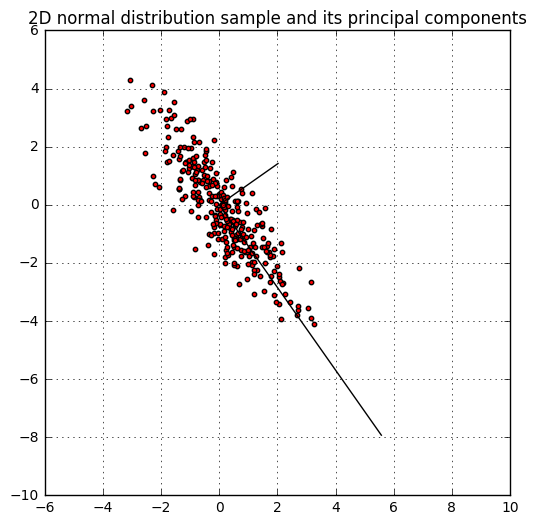

In [168]:
pca_version = 'my' # 'sklearn'

np.random.seed(0)
mean = np.array([0.0, 0.0])
cov  = np.array([[1.0, -1.0], 
                [-2.0, 3.0]])

X = np.random.multivariate_normal(mean, cov, 300)
if pca_version == 'my':
    pca = PCA()
else:
    pca = sklearn.decomposition.PCA()
    
pca.fit(X)
print('Proportion of variance explained by each component:\n' +\
      '1st component - %.2f,\n2nd component - %.2f\n' %
      tuple(pca.explained_variance_ratio_))
print('Directions of principal components:\n' +\
      '1st component:', pca.components_[0],
      '\n2nd component:', pca.components_[1])

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, c='r')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 10 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=1)
plt.grid()
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components')
plt.show()

Первая главная компонента (ей соответствует более длинный вектор) объясняет более 90% дисперсии исходных данных. Это говорит о том, что она содержит в себе почти всю информацию о расположении выборки в пространстве, и вторая компонента может быть опущена. Спроецируем данные на первую компоненту.

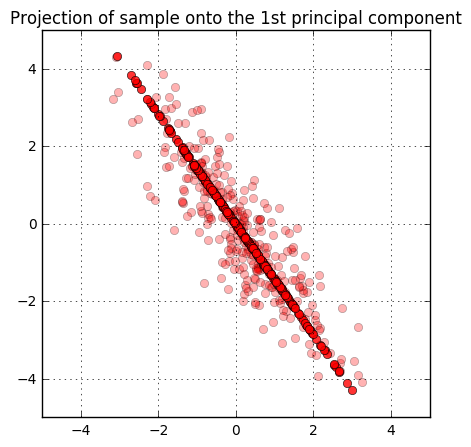

In [169]:
# Keep enough components to explain 90% of variance
pca = sklearn.decomposition.PCA(0.90)
X_reduced = pca.fit_transform(X)

# Map the reduced data into the initial feature space
X_new = pca.inverse_transform(X_reduced)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.8)
plt.grid()
plt.axis('equal')
plt.title('Projection of sample onto the 1st principal component')
plt.show()

Мы понизили размерность данных вдвое, при этом сохранив наиболее значимые черты. В этом заключается основной принцип понижения размерности – приблизить многомерный набор данных с помощью данных меньшей размерности, сохранив при этом как можно больше информации об исходных данных.

### Визуализация многомерных данных [[toc](#toc)]

Одним из применений метода главных компонент является визуализации многомерных данных в двухмерном (или трехмерном) пространстве. Для этого необходимо взять первые две главных компоненты и спроецировать данные на них. При этом, если признаки имеют различную природу, их следует отмасштабировать. Основные способы масштабирования:
- На единичную дисперсию по осям (масштабы по осям равны средним квадратичным отклонениям — после этого преобразования ковариационная матрица совпадает с матрицей коэффициентов корреляции).
- На равную точность измерения (масштаб по оси пропорционален точности измерения данной величины).
- На равные требования в задаче (масштаб по оси определяется требуемой точностью прогноза данной величины или допустимым её искажением — уровнем толерантности). 

#### Пример с набором данных Iris  [[toc](#toc)]

(150, 4) (150,)
Meaning of the 2 components:
0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.176 x petal length (cm) + -0.075 x petal width (cm)


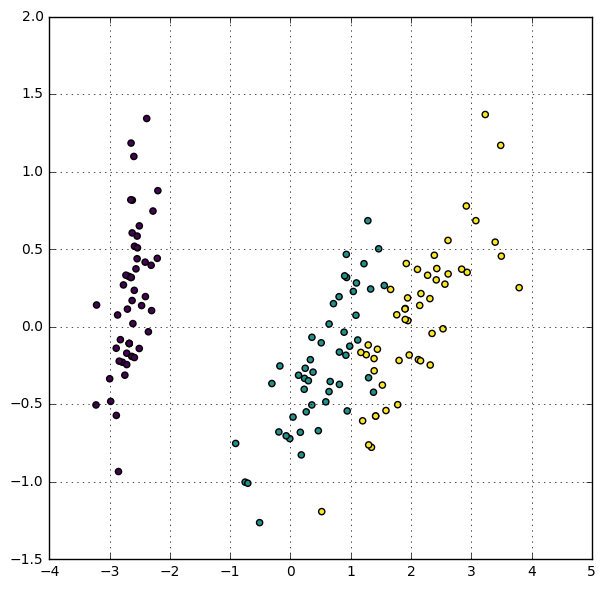

In [176]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target
print(X.shape, y.shape)

pca_version = 'my'
if pca_version == 'my':
    pca = PCA(n_components=2)
else:
    pca = sklearn.decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component, iris.feature_names)))
plt.figure(figsize=(7, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=20, cmap='viridis')
plt.grid()
plt.show()

### Пример с набором данных digits

Рассмотрим применение метода главных компонент для визуализации данных из набора изображений рукописных цифр.

(1797, 64) (1797,)
Projecting 64-dimensional data to 2D


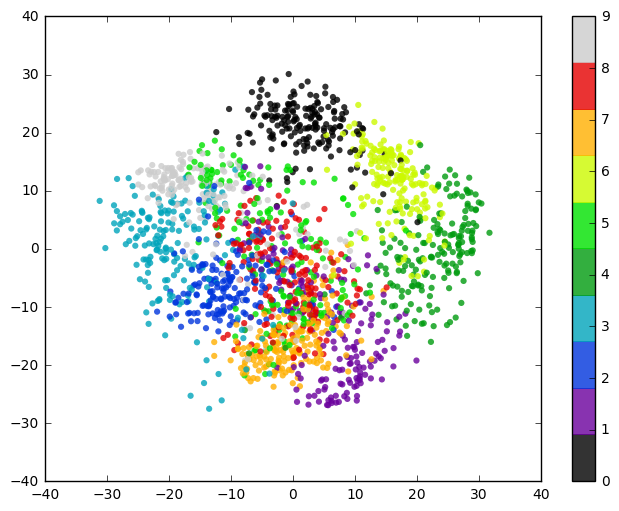

In [186]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target
print(X.shape, y.shape)

pca_version = 'scikit'
if pca_version == 'my':
    pca = PCA(n_components=2)
else:
    pca = sklearn.decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.8, s=20,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

Полученная картинка позволяет увидеть зависимости между различными цифрами. Например, цифры 0 и 6 располагаются в соседних кластерах, что говорит об их схожем написании. Наиболее "разбросанный" (по другим кластерам) – это кластер, соответствующий цифре 8, что говорит о том, что она имеет много различных написаний, делающих её схожей со многими другими цифрами.

Посмотрим, как выглядят первые две главные компоненты.

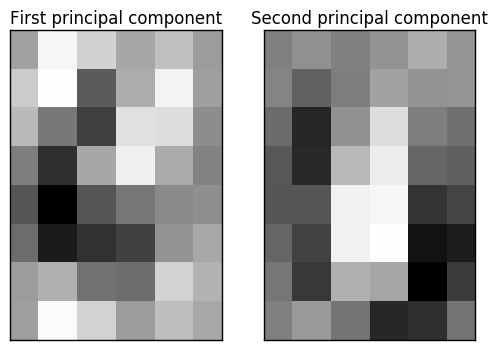

In [188]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

im = pca.components_[0]
ax1.imshow(im.reshape((8, 8)), cmap='binary', interpolation='none')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('First principal component')

im = pca.components_[1]
ax2.imshow(im.reshape((8, 8)), cmap='binary', interpolation='none')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Second principal component')
plt.show()

### Сжатие данных

Другим применением PCA является снижение размерности данных для их сжатия. Рассмотрим, как влияет число отбираемых главных компонент (на которые осуществляется проекция) на качество восстановления исходного изображения.

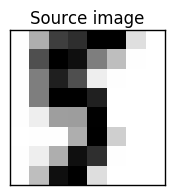

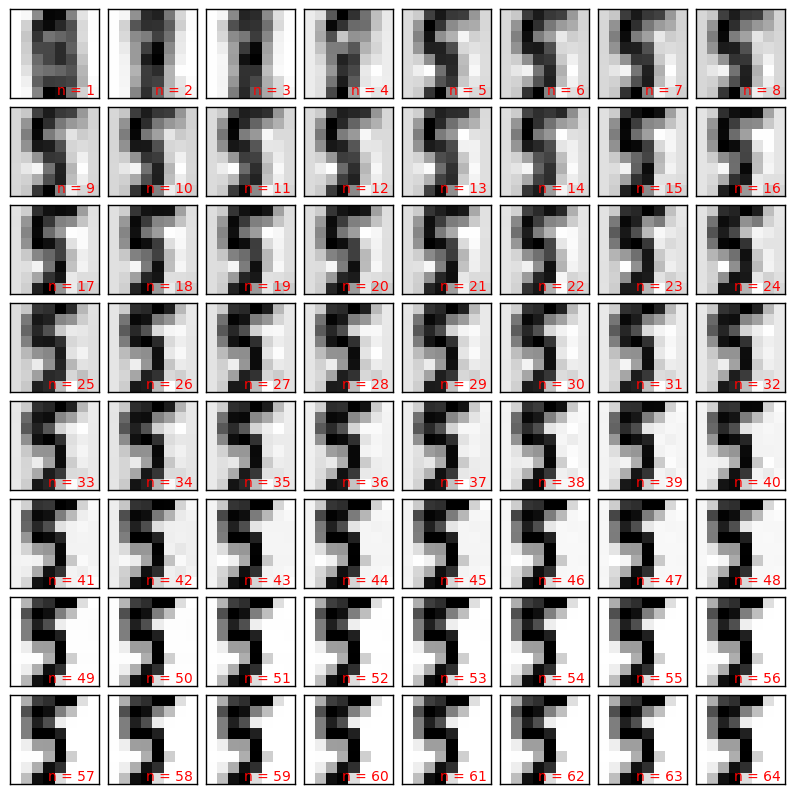

In [193]:
plt.figure(figsize=(4,2))
plt.imshow(X[15].reshape((8, 8)), cmap='binary', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.title('Source image')
plt.show()

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = sklearn.decomposition.PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[15].reshape(1, -1)))

    ax.imshow(im.reshape((8, 8)), cmap='binary', interpolation='none')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='red')
    ax.set_xticks([])
    ax.set_yticks([])

Как понять, какое число главных компонент достаточно оставить? Для этого может оказаться полезным следующий график, выражающий зависимость общей доли объясняемой дисперсии от числа главных компонент.

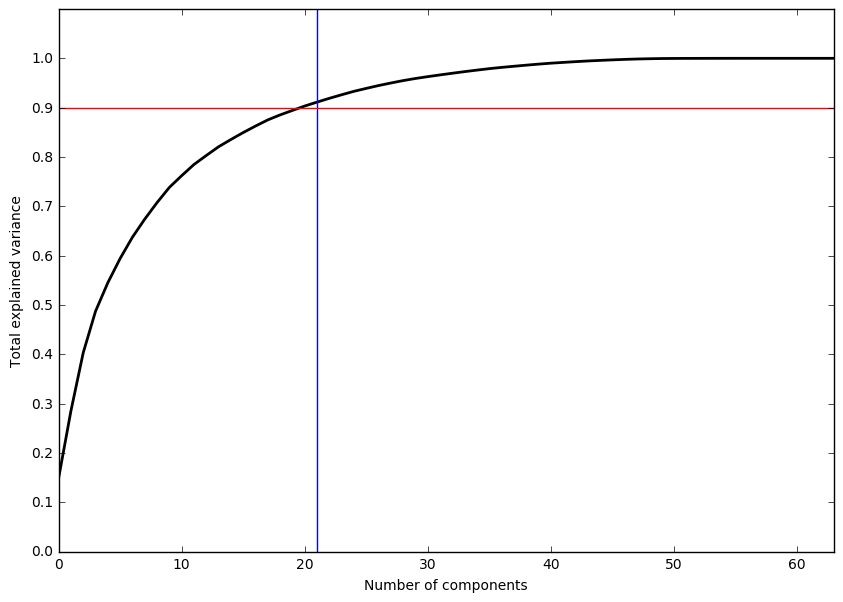

In [194]:
pca = sklearn.decomposition.PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show()

In [ ]:
pca = PCA(0.9).fit(X)
print('We need %d components to explain 90%% of variance' 
      % pca.n_components_)

### Предобработка данных
Метод главных компонент часто используется для предварительной обработки данных перед обучением классификатора. В качестве примера такого применения рассмотрим задачу о распознавании лиц. 

Для начала посмотрим на исходные данные.

In [195]:
%%time
from sklearn import datasets
from sklearn.model_selection import train_test_split

lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, 
                resize=0.4, data_home='../../data/faces')

print('%d objects, %d features, %d classes' % (lfw_people.data.shape[0],
      lfw_people.data.shape[1], len(lfw_people.target_names)))
print('\nPersons:')
for name in lfw_people.target_names:
    print(name)

/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread

/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread

/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread

/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread

/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated 

/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread

/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread

/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread

/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread

/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread

/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:173: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/home/alexander/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/datasets/lfw.py:164: DeprecationWarning: `imread` is deprecated!
`imread

1560 objects, 1850 features, 12 classes

Persons:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair
CPU times: user 9.59 s, sys: 2.15 s, total: 11.7 s
Wall time: 1min 26s


Распределение целевого класса:

In [196]:
for i, name in enumerate(lfw_people.target_names):
    print("{}: {} photos.".format(name, (lfw_people.target == i).sum()))

Ariel Sharon: 77 photos.
Colin Powell: 236 photos.
Donald Rumsfeld: 121 photos.
George W Bush: 530 photos.
Gerhard Schroeder: 109 photos.
Hugo Chavez: 71 photos.
Jacques Chirac: 52 photos.
Jean Chretien: 55 photos.
John Ashcroft: 53 photos.
Junichiro Koizumi: 60 photos.
Serena Williams: 52 photos.
Tony Blair: 144 photos.


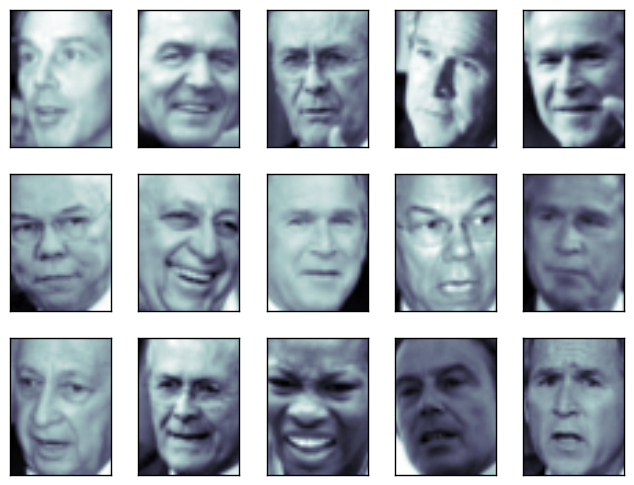

In [197]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='bone')

In [198]:
X_train, X_test, y_train, y_test = \
    train_test_split(lfw_people.data, lfw_people.target, random_state=0)

print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])

Train size: 1170 Test size: 390


Вместо обычного PCA воспользуемся его приближенной версией (randomized PCA), которая позволяет существенно ускорить работу алгоритма на больших наборах данных. Выделим 100 главных компонент. Как видно, они объясняют более 90% дисперсии исходных данных.

100 principal components explain 92.70% of variance


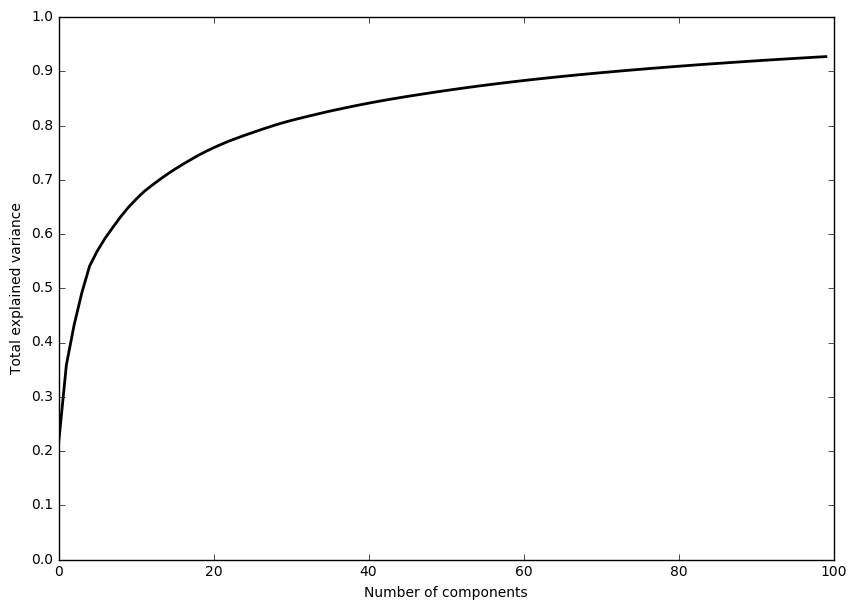

In [200]:
pca = sklearn.decomposition.PCA(n_components=100, svd_solver='randomized')
pca.fit(X_train)

print('100 principal components explain %.2f%% of variance' %
      (100 * np.cumsum(pca.explained_variance_ratio_)[-1]))
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color='k')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

Посмотрим на главные компоненты (или главные "лица"). Видим, что первые главные компоненты несут в себе информацию в основном об освещении на фотографии, в то время как оставшиеся выделяют какие-то отдельные черты человеческого лица - глаза, брови и другие.

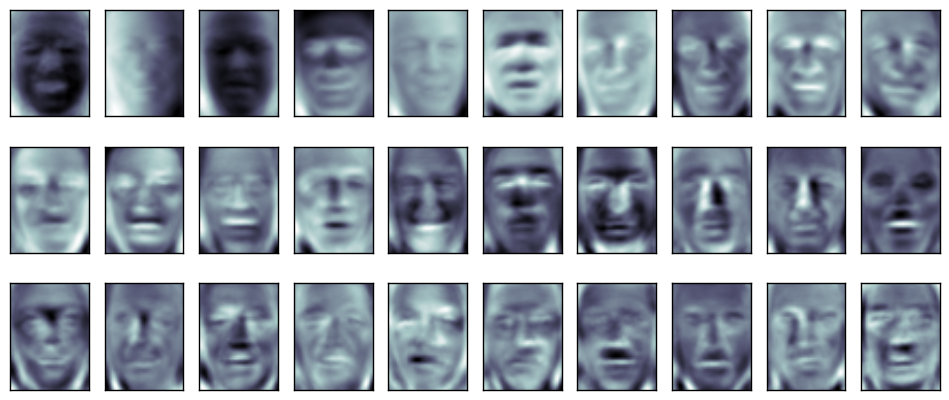

In [202]:
fig = plt.figure(figsize=(12, 5))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap='bone')

PCA позволяет посмотреть на "среднее" лицо – тут считается среднее по каждому новому признаку.

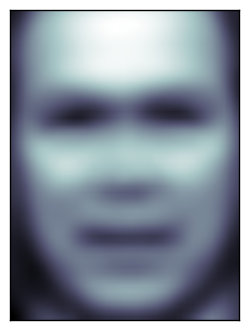

In [203]:
plt.imshow(pca.mean_.reshape((50, 37)), cmap='bone')
plt.xticks([])
plt.yticks([])
plt.show()

Перейдем теперь непосредственно к классификации. Мы сократили размерность данных (с 1850 признаков до 100), что позволяет существенно ускорить  работу стандартных алгоритмов обучения. Настроим SVM с RBF-ядром и посмотрим на результаты классификации.

In [204]:
%%time
from sklearn.svm import LinearSVC

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = LinearSVC(random_state=17).fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

CPU times: user 2.95 s, sys: 148 ms, total: 3.1 s
Wall time: 2.91 s


Accuracy: 0.430769
                   precision    recall  f1-score   support

     Ariel Sharon       0.07      0.07      0.07        15
     Colin Powell       0.51      0.65      0.57        65
  Donald Rumsfeld       0.19      0.14      0.16        29
    George W Bush       0.81      0.66      0.73       133
Gerhard Schroeder       0.38      0.18      0.24        33
      Hugo Chavez       0.16      0.25      0.20        16
   Jacques Chirac       0.05      0.17      0.08        12
    Jean Chretien       0.11      0.10      0.11        10
    John Ashcroft       0.10      0.11      0.10        18
Junichiro Koizumi       0.33      0.18      0.24        11
  Serena Williams       0.18      0.11      0.13        19
       Tony Blair       0.38      0.48      0.42        29

      avg / total       0.47      0.43      0.44       390



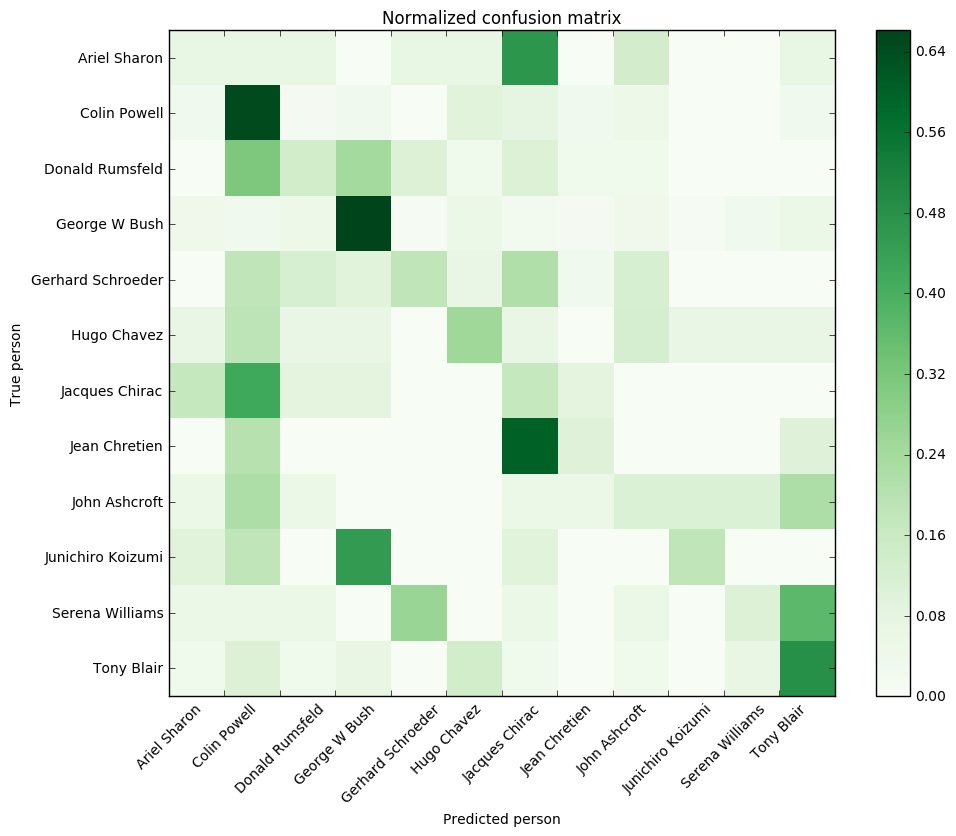

In [205]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Accuracy: %f" % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

M = confusion_matrix(y_test, y_pred)
M_normalized = M.astype('float') / M.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
im = plt.imshow(M_normalized, interpolation='nearest', cmap='Greens')
plt.colorbar(im, shrink=0.71)
tick_marks = np.arange(len(lfw_people.target_names))
plt.xticks(tick_marks - 0.5, lfw_people.target_names, rotation=45)
plt.yticks(tick_marks, lfw_people.target_names)
plt.tight_layout()
plt.ylabel('True person')
plt.xlabel('Predicted person')
plt.title('Normalized confusion matrix')
plt.show()

## Полезные ссылки
- [Формальное описание PCA](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82)
- [PCA in 3 steps](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)
- [SVD](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5)
- [Eigenface](https://en.wikipedia.org/wiki/Eigenface)
- [sklearn.decomposition](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)

<a id='app_images'></a>
## Применение к сжатию изображений [[toc](#toc)]

<a id='app_recover'></a>
## Задача восстановления профиля крыла [[toc](#toc)]